# Klasifikasi gambar Pokemon menggunakan KNN-Classifier

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import cv2
import glob
from collections import Counter
from imutils import paths
import imutils
import pickle
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

### Memuat dan mengolah gambar

In [2]:
!ls datasets | head -10

Thumbs.db
fire.0.png
fire.1.png
fire.10.png
fire.100.png
fire.101.png
fire.102.png
fire.103.png
fire.104.png
fire.105.png


ls: write error


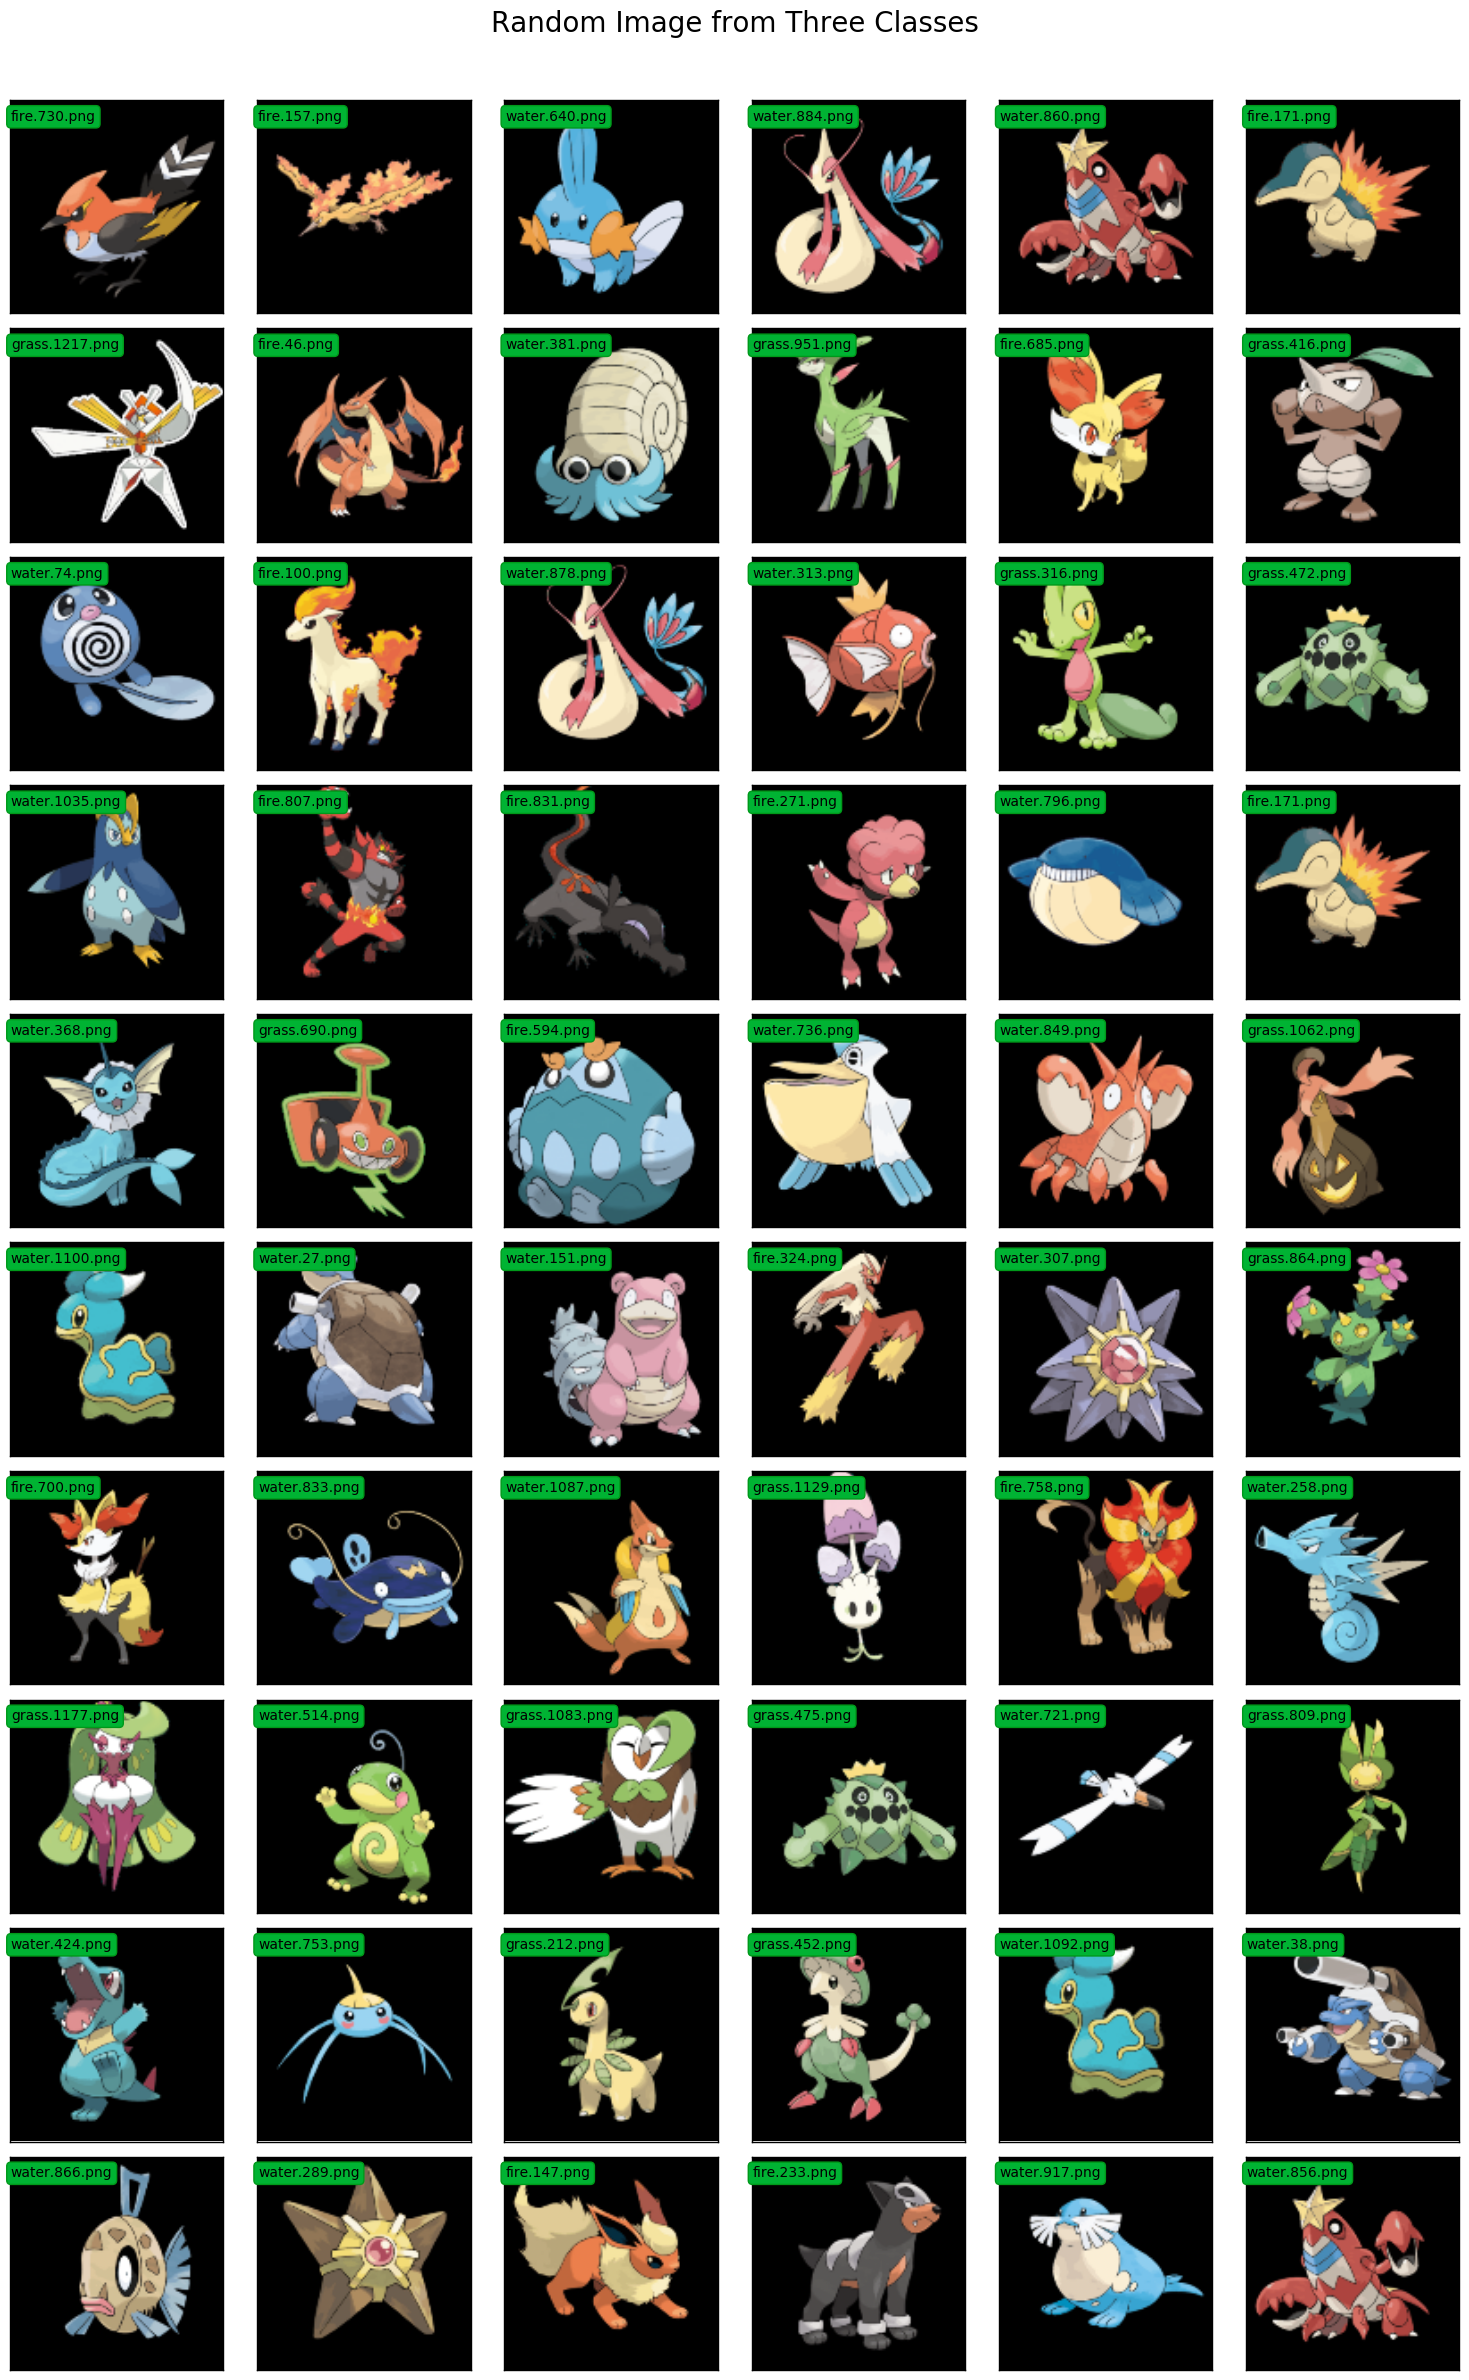

In [3]:
root_dir = 'datasets/'
rows = 10
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Three Classes', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break

        all_files = os.listdir(root_dir)
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, 5, str(rand_img), size=10, rotation=0,
                ha="left", va="top",
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

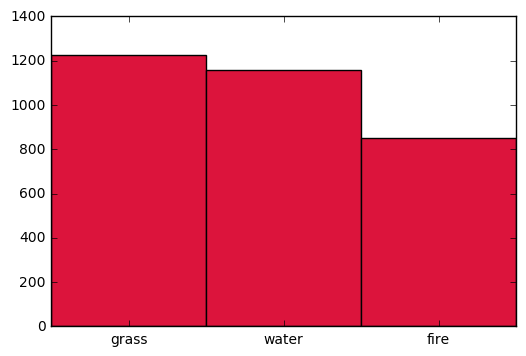

In [4]:
gambar=[]
kelas=[]
for img in glob.glob('datasets/*.png'):
    kelas+=[str(img).split('\\')[1].split('.')[0]]
    n=cv2.imread(img)
    gambar += [np.array(n)]


labels, values = zip(*Counter(kelas).items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width, color='crimson')
plt.xticks(indexes+width*0.5, labels)
plt.show()

### Klasifikasi gambar

In [5]:
def image_to_feature_vector(image, size=(120,120)):
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])

    if imutils.is_cv2():
        hist = cv2.normalize(hist)

    else:
        cv2.normalize(hist, hist)

    return hist.flatten()


print("[INFO] describing images...")
imagePaths = list(paths.list_images('datasets/'))

rawImages = []
features = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]

    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)

    rawImages.append(pixels)
    features.append(hist)
    labels.append(label)


if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.25, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.25, random_state=42)

print("[INFO] evaluating raw pixel accuracy...")
model = KNeighborsClassifier(n_neighbors=1)
model.fit(trainRI, trainRL)
filename ='model_raw_knn.sav'
pickle.dump(model, open(filename,'wb'))

acc = model.score(testRI, testRL)
print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

print("[INFO] evaluating histogram accuracy...")
model_color = KNeighborsClassifier(n_neighbors=1)
model_color.fit(trainFeat, trainLabels)
filename ='model_color_knn.sav'
pickle.dump(model_color, open(filename,'wb'))

acc = model_color.score(testFeat, testLabels)
print("[INFO] histogram accuracy: {:.2f}%".format(acc * 100))

[INFO] describing images...
[INFO] pixels matrix: 136.35MB
[INFO] features matrix: 6.46MB
[INFO] evaluating raw pixel accuracy...
[INFO] raw pixel accuracy: 82.55%
[INFO] evaluating histogram accuracy...
[INFO] histogram accuracy: 99.01%


In [2]:
model_raw_knn=pickle.load(open('model_raw_knn.sav', 'rb'))

In [14]:
model_color_knn=pickle.load(open('model_color_knn.sav', 'rb'))

In [3]:
def image_to_feature_vector(image, size=(120,120)):
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,[0, 180, 0, 256, 0, 256])

    if imutils.is_cv2():
        hist = cv2.normalize(hist)

    else:
        cv2.normalize(hist, hist)

    return hist.flatten()


print("[INFO] describing images...")
imagePaths = list(paths.list_images('datasets/'))

rawImages = []
features = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]

    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)

    rawImages.append(pixels)
    features.append(hist)
    labels.append(label)


if i > 0 and i % 1000 == 0:
        print("[INFO] processed {}/{}".format(i, len(imagePaths)))

rawImages = np.array(rawImages)
features = np.array(features)
labels = np.array(labels)
print("[INFO] pixels matrix: {:.2f}MB".format(rawImages.nbytes / (1024 * 1000.0)))
print("[INFO] features matrix: {:.2f}MB".format(features.nbytes / (1024 * 1000.0)))

(trainRI, testRI, trainRL, testRL) = train_test_split(rawImages, labels, test_size=0.25, random_state=42)
(trainFeat, testFeat, trainLabels, testLabels) = train_test_split(features, labels, test_size=0.25, random_state=42)

[INFO] describing images...
[INFO] pixels matrix: 136.35MB
[INFO] features matrix: 6.46MB


In [4]:
y_pred = model_raw_knn.predict(testRI)

In [9]:
print("Akurasi : ", accuracy_score(testRL, y_pred))

Akurasi :  0.825495049505


In [15]:
y_pred_color = model_color_knn.predict(testFeat)

In [17]:
print("Akurasi : ", accuracy_score(testLabels, y_pred_color))

Akurasi :  0.990099009901


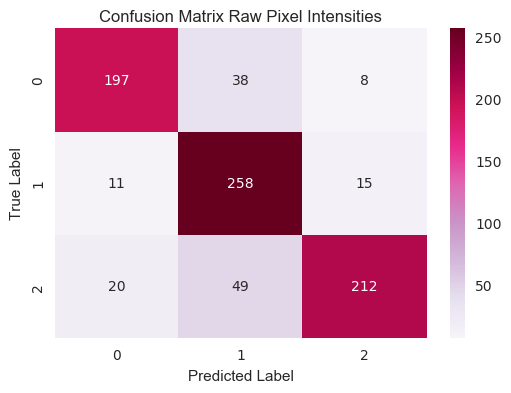

In [18]:
cm = confusion_matrix(testRL,y_pred)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix Raw Pixel Intensities')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()


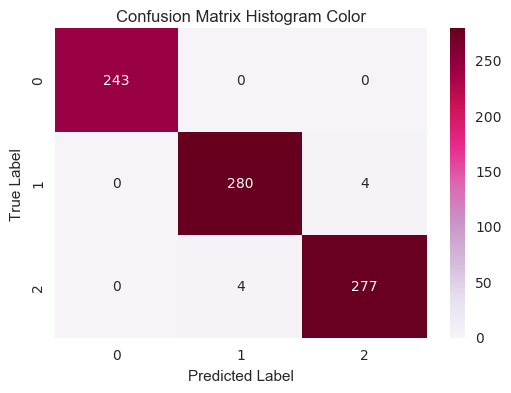

In [19]:
cm = confusion_matrix(testLabels,y_pred_color)
ax = plt.axes()
sns.heatmap(cm, annot=True, fmt="d", cmap="PuRd")
ax.set_title('Confusion Matrix Histogram Color')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')
plt.show()